In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pickle
import numpy as np

In [15]:
with open("/content/drive/MyDrive/Data/test_qa-220120-145430.txt", "rb") as fp:
    test_data = pickle.load(fp)

In [16]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [17]:
with open("/content/drive/MyDrive/Data/train_qa-220120-145526.txt", "rb") as fp:
    train_data = pickle.load(fp)

In [18]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [19]:
type(test_data)

list

In [20]:
type(train_data)

list

In [21]:
len(test_data)

1000

In [101]:
len(train_data)

10000

In [23]:
train_data[0]
# this will give us the story, question and the answer

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [24]:
' '.join(train_data[0][0])
# This only gives us the story

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [25]:
' '.join(train_data[0][1])
# This gives us the question

'Is Sandra in the hallway ?'

In [26]:
train_data[0][2]           # This gives us the Answer
# As there is only single element in the answer, we didn't use the ' '.join() method

'no'

In [27]:
# Set up Vocabulary
vocab = set()

In [28]:
all_data = test_data + train_data

In [29]:
type(all_data)

list

In [30]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [31]:
# In the whole train_data or test_data lists, each element of the list is a Tuple. Each tuple consists of two lists and a single element. First list in the Tuple represents story, Second list inside the Tuple represents Question and the single element in the tuple represents Answer 

In [32]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [33]:
# In our data set, our answers are either "yes" or "no"
vocab.add('yes')
vocab.add("no")

In [34]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [35]:
len(vocab)          # Thus we have 37 Unique words in the set

37

In [45]:
vocab_len = len(vocab) + 1          # We need extra space for pad_sequence

In [37]:
# we would like to sort according to the maximum story length
for data in all_data:
    print(data[0])
    print("\n")             # new line
    
# This prints story, question and answer in a single line

Streaming output truncated to the last 5000 lines.


['Sandra', 'moved', 'to', 'the', 'bedroom', '.', 'Sandra', 'went', 'back', 'to', 'the', 'hallway', '.', 'Daniel', 'grabbed', 'the', 'football', 'there', '.', 'Sandra', 'moved', 'to', 'the', 'garden', '.', 'Mary', 'went', 'back', 'to', 'the', 'garden', '.', 'Daniel', 'discarded', 'the', 'football', 'there', '.', 'Sandra', 'went', 'to', 'the', 'bathroom', '.', 'Daniel', 'picked', 'up', 'the', 'football', 'there', '.', 'Sandra', 'journeyed', 'to', 'the', 'office', '.', 'Daniel', 'went', 'to', 'the', 'bathroom', '.']


['Sandra', 'journeyed', 'to', 'the', 'bathroom', '.', 'John', 'grabbed', 'the', 'football', 'there', '.']


['Sandra', 'journeyed', 'to', 'the', 'bathroom', '.', 'John', 'grabbed', 'the', 'football', 'there', '.', 'John', 'dropped', 'the', 'football', '.', 'Mary', 'journeyed', 'to', 'the', 'garden', '.']


['Sandra', 'journeyed', 'to', 'the', 'bathroom', '.', 'John', 'grabbed', 'the', 'football', 'there', '.', 'John', 'dro

In [38]:
# to find max story length
l = []
for data in all_data:
    l.append(len(data[0]))
print(max(l))
    


156


In [39]:
# the above format can be written in a short way using list comprehension
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [40]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [41]:
# vectorizing the data     --converts into numerical form
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [2]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [6]:
tokenizer = Tokenizer(filters = [])     # we dont require the filters, thus we keep filters as an empty list

In [43]:
tokenizer.fit_on_texts(vocab)

In [103]:
tokenizer.word_index       # the numbers(ID's or Rollnumbers) are assigned to the words

{'mary': 1,
 'journeyed': 2,
 'to': 3,
 'office': 4,
 'moved': 5,
 'kitchen': 6,
 'picked': 7,
 'hallway': 8,
 'is': 9,
 'left': 10,
 'discarded': 11,
 'back': 12,
 'in': 13,
 'up': 14,
 'down': 15,
 'milk': 16,
 '?': 17,
 'the': 18,
 '.': 19,
 'garden': 20,
 'grabbed': 21,
 'apple': 22,
 'bathroom': 23,
 'put': 24,
 'dropped': 25,
 'yes': 26,
 'bedroom': 27,
 'sandra': 28,
 'john': 29,
 'travelled': 30,
 'no': 31,
 'there': 32,
 'football': 33,
 'went': 34,
 'daniel': 35,
 'got': 36,
 'took': 37}

In [108]:
train_story_text = []
train_question_text = []
train_answers = []
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)



In [109]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)       # we are doing vectorization

In [110]:
len(train_story_text)

10000

In [111]:
len(train_story_seq)

10000

In [112]:
train_story_seq

[[1, 5, 3, 18, 23, 19, 28, 2, 3, 18, 27, 19],
 [1,
  5,
  3,
  18,
  23,
  19,
  28,
  2,
  3,
  18,
  27,
  19,
  1,
  34,
  12,
  3,
  18,
  27,
  19,
  35,
  34,
  12,
  3,
  18,
  8,
  19],
 [1,
  5,
  3,
  18,
  23,
  19,
  28,
  2,
  3,
  18,
  27,
  19,
  1,
  34,
  12,
  3,
  18,
  27,
  19,
  35,
  34,
  12,
  3,
  18,
  8,
  19,
  28,
  34,
  3,
  18,
  6,
  19,
  35,
  34,
  12,
  3,
  18,
  23,
  19],
 [1,
  5,
  3,
  18,
  23,
  19,
  28,
  2,
  3,
  18,
  27,
  19,
  1,
  34,
  12,
  3,
  18,
  27,
  19,
  35,
  34,
  12,
  3,
  18,
  8,
  19,
  28,
  34,
  3,
  18,
  6,
  19,
  35,
  34,
  12,
  3,
  18,
  23,
  19,
  35,
  7,
  14,
  18,
  33,
  32,
  19,
  35,
  34,
  3,
  18,
  27,
  19],
 [1,
  5,
  3,
  18,
  23,
  19,
  28,
  2,
  3,
  18,
  27,
  19,
  1,
  34,
  12,
  3,
  18,
  27,
  19,
  35,
  34,
  12,
  3,
  18,
  8,
  19,
  28,
  34,
  3,
  18,
  6,
  19,
  35,
  34,
  12,
  3,
  18,
  23,
  19,
  35,
  7,
  14,
  18,
  33,
  32,
  19,
  35,
  34,
  3,
  18

In [115]:
# functionalize the vecctorization
def vectorize_stories(data, word_index = tokenizer.word_index,
                      max_story_len = max_story_len, max_ques_len = max_ques_len):
  
  # data consists of stories, question and answer
    X = []   # stories
    Xq = []  # Question
    Y = []   # correct Answer

    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) +1)        # 1 is reserved
        y[word_index[answer]] = 1
     
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return(pad_sequences(X, maxlen = max_story_len),
           pad_sequences(Xq, maxlen = max_ques_len),
           np.array(Y))

In [116]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [117]:
inputs_train

array([[ 0,  0,  0, ..., 18, 27, 19],
       [ 0,  0,  0, ..., 18,  8, 19],
       [ 0,  0,  0, ..., 18, 23, 19],
       ...,
       [ 0,  0,  0, ..., 18, 27, 19],
       [ 0,  0,  0, ..., 16, 32, 19],
       [ 0,  0,  0, ..., 22, 32, 19]], dtype=int32)

In [118]:
queries_test

array([[ 9, 29, 13, 18,  6, 17],
       [ 9, 29, 13, 18,  6, 17],
       [ 9, 29, 13, 18, 20, 17],
       ...,
       [ 9,  1, 13, 18, 27, 17],
       [ 9, 28, 13, 18, 20, 17],
       [ 9,  1, 13, 18, 20, 17]], dtype=int32)

In [125]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
tokenizer.word_index['yes']      # just to check 

26

In [126]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [127]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len))

In [128]:
# build the end to end network

In [131]:
# Input Encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [135]:
#input_encoder_c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [134]:
#Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

In [136]:
#Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [138]:
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [139]:
response = add([match,input_encoded_c ])
response = Permute((2,1))(response)

In [140]:
# concatenate
answer = concatenate([response,question_encoded ])

In [141]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_2')>

In [142]:
# LSTM -- long short term memory
answer = LSTM(32)(answer)

In [93]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)
answer = Activation('softmax')(answer)

In [143]:
# regularize the dropouts
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [150]:
answer = Activation('softmax')(answer)

In [151]:
# build the final model
model = Model([input_sequence, question],answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [147]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_6 (Sequential)      (None, None, 64)     2432        ['input_5[0][0]']                
                                                                                                  
 sequential_9 (Sequential)      (None, 6, 64)        2432        ['input_6[0][0]']                
                                                                                            

In [152]:
# train the model
history = model.fit([inputs_train, queries_train], answers_train, batch_size = 32, epochs = 20, validation_data = ([inputs_test, queries_test], answers_test) )

Epoch 1/20
313/313 [==============================] - 5s 11ms/step - loss: 3.0256 - accuracy: 0.6844 - val_loss: 3.0035 - val_accuracy: 0.6880
Epoch 2/20
313/313 [==============================] - 3s 8ms/step - loss: 3.0021 - accuracy: 0.6914 - val_loss: 2.9927 - val_accuracy: 0.6940
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 2.9911 - accuracy: 0.6982 - val_loss: 2.9888 - val_accuracy: 0.6940
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 2.9825 - accuracy: 0.7040 - val_loss: 2.9897 - val_accuracy: 0.6910
Epoch 5/20
313/313 [==============================] - 3s 8ms/step - loss: 2.9808 - accuracy: 0.7033 - val_loss: 2.9806 - val_accuracy: 0.7000
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 2.9823 - accuracy: 0.7014 - val_loss: 2.9852 - val_accuracy: 0.6980
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 2.9775 - accuracy: 0.7072 - val_loss: 2.9840 - val_accuracy: 0.6970
Epoch

In [149]:
# model has been trained successfully

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

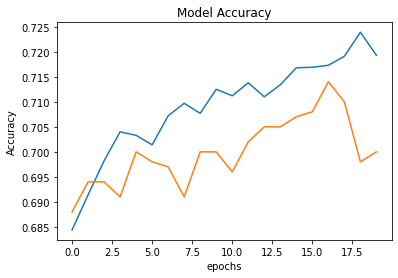

In [159]:
import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")

In [160]:
#save
model.save("chatbot_model")

In [161]:
# Evaluation on the test set
model.load_weights("chatbot_model")


In [162]:
pred_results = model.predict(([inputs_test, queries_test]))

In [163]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [185]:
story = ' '.join(word for word in test_data[23][0])

In [186]:
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [187]:
query = ' '.join(word for word in test_data[23][1])

In [188]:
query

'Is Sandra in the bedroom ?'

In [189]:
test_data[23][2]

'no'

In [207]:
# generate predictions from the model
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print('Predicted answer is' ,k)
print("Probability of certainity", pred_results[0][val_max])

Predicted answer is no
Probability of certainity 0.06843695


In [216]:
# now we create our own story and try to test the model 😉
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [231]:
story = "Mary dropped the football . Sandra discarded apple in kitchen . Daniel went to office . "
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen',
 '.',
 'Daniel',
 'went',
 'to',
 'office',
 '.']

In [238]:
my_question = "Is Daniel in the office ? "

In [239]:
my_question.split()

['Is', 'Daniel', 'in', 'the', 'office', '?']

In [234]:
mydata = [(story.split(), my_question.split(), 'yes')]

In [235]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [236]:
pred_results = model.predict(([my_story, my_ques]))

In [240]:
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print('Predicted answer is' ,k)
print("Probability of certainity", pred_results[0][val_max])

Predicted answer is yes
Probability of certainity 0.06843904
